# AI Assistant
## Group Members:
 - Krylova Alena
 - Dudic Mateja
 - Saavedra Triana Erwin Omar
 - Maringer Kelvin

## Python Version:
 - 3.13

## Contributions:
 - Krylova Alena:
     - ...
 - Dudic Mateja:
     - ...
 - Saavedra Triana Erwin Omar:
     - ...
 - Maringer Kelvin:
     - ...

# FIRST TIME SETUP
# ----------------
# MAKE SURE THAT THIS CELL RUNS WITHOUT ERRORS BEFORE PROCEEDING
# ----------------

In [3]:
# All the packages that have to be installed should be listed here
%pip install numpy pandas matplotlib seaborn kagglehub ipywidgets --quiet
# This will filter out the output from Jupyter Notebooks when committing to git, so that diffs are cleaner
! git config filter.strip-notebook-output.clean 'jupyter nbconvert --ClearOutputPreprocessor.enabled=True --to=notebook --stdin --stdout --log-level=ERROR'

import kagglehub
import platform

# Download latest version
dataset_path = kagglehub.dataset_download("prince7489/daily-ai-assistant-usage-behavior-dataset") + ("/Daily_AI_Assistant_Usage_Behavior_Dataset.csv" if platform.system() != "Windows" else "\\Daily_AI_Assistant_Usage_Behavior_Dataset.csv")

print("Path to dataset files:", dataset_path)

Note: you may need to restart the kernel to use updated packages.


error: no action specified


Path to dataset files: C:\Users\krylo\.cache\kagglehub\datasets\prince7489\daily-ai-assistant-usage-behavior-dataset\versions\1\Daily_AI_Assistant_Usage_Behavior_Dataset.csv


# ----------------------
# ----------------------

In [4]:
#All the imports should be listed here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea


## *Dataset Overview*
The Daily AI Assistant Usage Behavior Dataset captures real-world patterns of how users interact with AI assistants throughout their daily activities. It provides insights into when, how, and for what purposes people used AI tools, as well as session characteristics and user satisfaction.

The dataset is published on the Kaggle platform and is intended for researchers, developers, and data science practitioners interested in user behavior analysis, personalization systems, recommendation engines, and conversational AI. It covers a wide range of AI usage scenarios, including learning, productivity, research, and routine daily tasks.

The dataset contains 300 rows and 8 columns.

*Features (their meaning and data types):*  
1st column: timestamp - date and time when the interaction with an AI tool started, data type - categorical (string)  
2nd column: device - type of device which was used to access an AI tool (desktop, mobile, smart speaker), data type - categorical (string)  
3rd column: usage_category - for what purpose the user used an AI tool (education, daily tasks, research and etc), data type - categorical (string)  
4th column: prompt_length - lenght of the user`s prompt (measured in charakters), data type - integer  
5th column: session_length_minutes - duration of the session in minutes, data type - float  
6th column: satisfaction_rating - user satisfaction score from 1 to 5, data type - integer  
7th column: assistant_model - which AI assistant model was used during the session, data type - categorical(string)  
8th column: tokens_used - number of tokens used during the session, data type - integer  

Most features from the data set are categorical, making the dataset suitable for analyzing patterns and user behavior segmentation (for example, feature 'timestamp' allows to see if people use AI tools more often on weeekdays or weekends, in the mornings or in the evenings).

To obtain a statistical summary of the numerical features, the describe() method was used.
It provided key statistics such as mean, standard deviation, minimum and maximum values, as well as quartiles. It allows to better understand distributaion of data.   
*Some observations from the desccribe() function:*   
The average prompt length is 129 characters, it indicates that users often submit detailed prompts.  
The average session duration is about 7.7 minutes, indicating that most interactions with the AI assistant are relatively short.  
The average satisfaction rating is close to 3 (on a scale from 1 to 5), which shows users` experience in general is neutral (or positiv.)  
Token usage varies significantly, showing the differences in query complexity.  


In [5]:
## Code for the dataset overview Here
data = pd.read_csv(dataset_path)
print(data.head())
print(data.info())   # to get information about the dataframe (number of rows, columns, data types)
# to get basic statistics about the dataframe (mean, std, min, max, etc.)
print(data.describe())

             timestamp         device usage_category  prompt_length  \
0  2025-02-20 03:29:00        Desktop      Education             14   
1  2025-01-08 18:28:00         Mobile    Daily Tasks             32   
2  2025-01-12 17:56:00  Smart Speaker      Education            236   
3  2025-01-04 09:11:00  Smart Speaker   Productivity             98   
4  2025-02-14 19:59:00  Smart Speaker       Research            220   

   session_length_minutes  satisfaction_rating assistant_model  tokens_used  
0                    7.08                    5         GPT-5.1           44  
1                   13.07                    2          GPT-4o         1047  
2                   10.15                    4          GPT-4o         1379  
3                   14.45                    1           GPT-5         1105  
4                    4.50                    5         GPT-5.1          107  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 

## *Data Quality Check*



Missing values per columns: 
 timestamp                 0
device                    0
usage_category            0
prompt_length             0
session_length_minutes    0
satisfaction_rating       0
assistant_model           0
tokens_used               0
dtype: int64


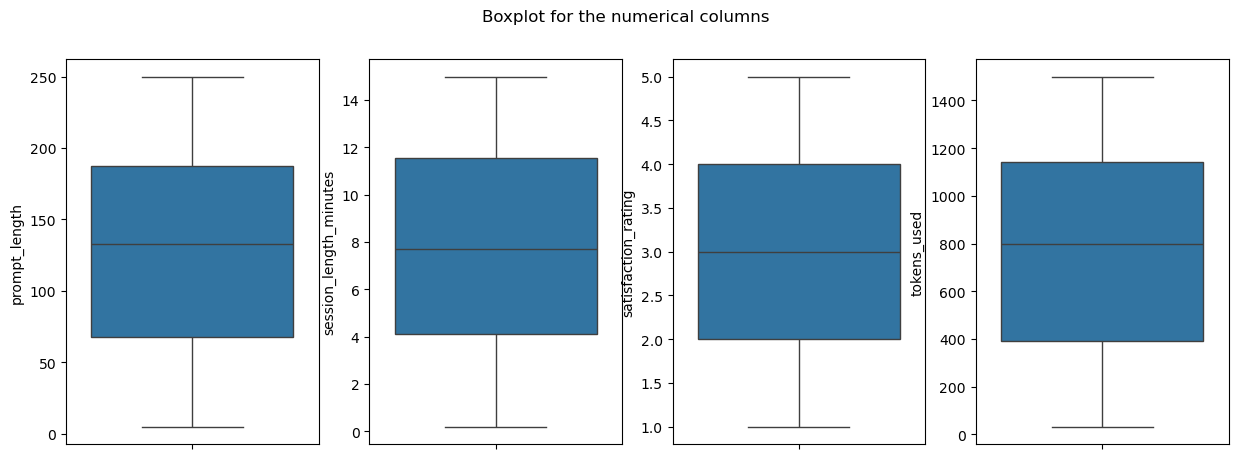

device
Smart Speaker    83
Desktop          81
Mobile           68
Tablet           68
Name: count, dtype: int64
usage_category
Education        54
Productivity     46
Writing          46
Research         42
Entertainment    40
Daily Tasks      36
Coding           36
Name: count, dtype: int64
assistant_model
GPT-4o     79
o1         59
GPT-5      56
Mini       55
GPT-5.1    51
Name: count, dtype: int64


In [ ]:
## Code for the data quality check Here
print(f"Missing values per columns: \n {data.isnull().sum()}") 
# The dataset contains no missing values
rows = 1
cols = len(data.select_dtypes(include=[np.number]).columns)
fig, axes = plot.subplots(rows, cols, figsize=(15,5))
axes = axes.flatten()

for i, col in enumerate(data.select_dtypes(include=[np.number]).columns):
    sea.boxplot(y=data[col], ax=axes[i])
plot.suptitle("Boxplot for the numerical columns ")
plot.show()

#from the boxplots we can see that there are no outliers in the numerical columns

print(data['device'].value_counts())
print(data['usage_category'].value_counts())
print(data['assistant_model'].value_counts())
# For the categorical columns, we examined  the unique values and their frequencies. There are no unusual or extremely rare entries, so no outliers were detected in the dataset.


## *Data-Preprocessing*
 - Additional Notes etc...

In [ ]:
# From here you can take for the Data Quality Check
RAW_data = pd.read_csv(dataset_path)

# first we check the number of missing values in each column
print(RAW_data.isnull().sum())
# after checking we can see that there are no missing values in the dataset

# so for the outliers in this dataset , I think the best aproach would be to leave them and just mark them as outliers. In this dataset the outliers might be relevant data from users that have a diferent behavior than the average user, so removing them would mean losing relevant data.

# now we will check for outliers using the IQR method

y = RAW_data.select_dtypes(include=[np.number])
print(y)
for column in y:
    quartile_min = RAW_data[column].quantile(0.25)
    quartile_max = RAW_data[column].quantile(0.75)

    IQR = quartile_max - quartile_min

    lower_bound = quartile_min - 1.5 * IQR
    upper_bound = quartile_max + 1.5 * IQR

    outliers_promt_length = RAW_data[(RAW_data[column] < lower_bound) | (RAW_data[column] > upper_bound)].count()
    outliers_promt_length = outliers_promt_length.sum()

    print(f"the number of outliers in {column} is the following: \n{outliers_promt_length}")

 # Start of the data preprocessing

# after checking we can see that there are no outliers in the dataset, surprinsing but good.
# next we will check for duplicates in the dataset
x = RAW_data.duplicated().sum()
print(f"the number of duplicates in the dataset is the following: \n{x}")
# after checking we can see that there are no duplicates in the dataset

#

# so we continue with creating the required columns


# I made an funtion for this part so its easier to read , and taking noticing that the timestamp is an string i decided to slice the string to get the hour part and then convert it to int to compare it
def timeOfDay(hour):
    if 5 <= hour <= 11:
        return "morning"
    elif 12 <= hour <= 17:
        return "afternoon"
    elif 18 <= hour <= 22:
        return "evening"
    else:
        return "Night"

RAW_data["timeOfDay"] = RAW_data["timestamp"].apply(lambda x:timeOfDay(int(x[11:-6])))
RAW_data["year"] = RAW_data["timestamp"].apply(lambda x:int(x[0:4]))

# now we are going to convert the columns and timestamp to their proper datatypes

RAW_data["timestamp"] = pd.to_datetime(RAW_data["timestamp"])
RAW_data["device"] = RAW_data["device"].astype("category")
RAW_data["assistant_model"] = RAW_data["assistant_model"].astype("category")
RAW_data["timeOfDay"] = RAW_data["timeOfDay"].astype("category")
RAW_data["usage_category"] = RAW_data["usage_category"].astype("category")

# note that the numericals stay the same, and I decided to leave year as a number

RAW_data




## *Data Analysis*
 - Additional Notes etc...

In [ ]:
#1. Different AI Assistants used (count and percentage).

assistant = RAW_data['assistant_model'] #selecting the column assistant_model
count = assistant.value_counts() #counting how many times each assistant appears
percentage = ((count/RAW_data['assistant_model'].count())*100).round(2) #calculating the percentage of each assistants occurrence

different_assistants = pd.DataFrame({'count': count, 'percentage': percentage}) #making a dataframe with the results
print(different_assistants)
#There is 5 different AI models in the dataset

#2. Average session length per assistant model

average_session_length = RAW_data.groupby('assistant_model')['session_length_minutes'].mean().round(2)
average_session_length_output = pd.DataFrame({'Average length': average_session_length})
print(average_session_length_output)
#Average session length is relatively similar for all AI models, with the highest being GPT-5 at 8.15 and the lowest being o1 at 7.18 minutes

#3. Usage category per assistant model
pivotinho = pd.pivot_table(RAW_data, index='assistant_model', columns='usage_category', aggfunc='count', values='timestamp')
print(pivotinho)
# An interesting observation is that o1 is used the most for Writing and Education compared to other categories, most likely due to better reasoning than other models, 
# In general the most used models are the three GPT models, with GPT-4 being the most consistently used of the three

#4. Longest average prompt length and use time per task
longest_avg_prompt = RAW_data.groupby('usage_category')['prompt_length'].mean().round(2)
print(longest_avg_prompt)

longest_avg_time = RAW_data.groupby('usage_category')['session_length_minutes'].mean().round(2)
print(longest_avg_time)
#The longest average prompt length is in Research with 141.26 characters on average, while the longest average session length is for coding with 8.51 seconds

#5. Usage category per time of day
usage_category_per_timeOfDay = pd.pivot_table(RAW_data, index='usage_category', columns='timeOfDay', aggfunc='count', values='timestamp')
print(usage_category_per_timeOfDay)
# Most categories have a specific time of day during which they are the least occurent. For example, education is least used at night, while writing is the least used during the evening


#6. Popularity of assistants over time
assistant_model_per_year = pd.pivot_table(RAW_data, index='assistant_model', columns='year', aggfunc='count', values='timestamp')
print(assistant_model_per_year)
#just one year is given and the most used assistant is GPT-4

In [ ]:
## code for data analysis here
print("helo")